<a href="https://colab.research.google.com/github/VictorPabloCristina/DataSet-Proyecto-F-CH/blob/main/SegundaEntrega_CristinaVictorPablo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sintesis

**Mercado de Traspaso de Jugadores de Futbol
 Análisis Internacional**


Dentro de la estructura y organización profesional del fútbol internacional se observa la existencia de un importante mercado, el de los jugadores, que conforma una buena muestra en el seno de la actividad económica mundial.

Se trata de un mercado con características particulares, y que, por las dimensiones (presentes y futuras) merece atención relevante.

Por este motivo el presente análisis pretende describir el funcionamiento del mercado, encontrar nichos de inversiones y predecir precios de venta, compra y oportunidades de transacciones que permitan enriquecer el ecosistema y ser competitivos al momento de magistrar un negocio.








# Objetivo

Armar un sistema que prediga el precio de jugadores de futbol en base a sus habilidades

# Contexto Comercial

Un centro de investigacion de mercado nos ha contactado para crear un sistema de predisibilidad de valores de jugadores para regular el mercado, hoy es un mercado que se evalua con especulacion, y la idea es sistematizar dicho mercado a fin de ser mas acertivo entre lo que un jugador otorga al mercado y su precio



# Problema Comercial

¿ Que variables son las que influencian el precio del jugador?

¿ Existe diferencia de potencia o rendimiento entre zurdos y diestros?

¿ Que paises acumulan el mayor potencial de jugadores?

¿ Que posicion de juego es la mas cotizada?

¿ Cual es el salario apropiado de un jugador segun su posicion de juego?



# Contexto Analitico

Base de datos extraida de la fuente oficial de FIFA 2022


https://opennetzero.org/dataset/fifa-world-cup-qatar-2022

# Descripcion de variables de interres del Dataset

ID:ID

Name: Nombre del Jugador

Age: Edad

Nationality: Nacionalidad

Overall: Calificacion General

Potential: Potencial

Club: Club actual en donde esta jugando

Wage: Salario del Jugador

Value: Valoracion del jugador en el mercado

Preferred Foot: Pie mas habilidoso

International Reputation: Reputacion internacional

Skill Moves: Movimientos mas habiles del jugador

Position: Posicion de juego

Jersey Number: Numero de camiseta

Finishing: Remate

HeadingAccuracy: Presicion de cabeceo

ShortPassing: Pases cortos

Volleys: Voleas

Dribbling: Regate

BallControl: Control del balon

Acceleration: Aceleracion

Agility: Agilidad con el balon

ShotPower: Potencia de tiro

Stamina: Resistencia

Strength: Fuerza

Penalties: Penalizaciones

----------------------------------------------------------------


Abreviatura (ING)    Posición

GK     Portero

RWB    Carrilero Derecho

RB     Lateral Derecho

CB     Defensa Central

LF     Lateral Izquierdo

LWB    Carrilero Izquierdo

CDM    Medio Centro Defensivo

RM     Medio Derecho

CM     Medio Centro

LM     Medio Izquierdo

CAM    Medio Centro Ofensivo

RF     Segundo Delantero Derecho

CF     Media Punta

LF     Segundo Delantero Izquierdo

RW     Extremo Derecho

ST     Delantero Centro

LW     Extremo Izquierdo




# Importacion de librerias y Preparacion inicial del Dataset

Importamos librerias a utilizar

In [1]:
#visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
#lectura y análisis
import numpy as np
import pandas as pd
import scipy
import missingno as msno


#Machine Learning
import sklearn # Paquete base de ML

#adicionales
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix



#escaladores
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

**Importamos el DataSet a trabajar**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/VictorPabloCristina/DataSet-Proyecto-F-CH/main/FIFA22_official_data.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print=(df.shape)
df.head(3)

#Fuente: https://opennetzero.org/dataset/fifa-world-cup-qatar-2022}

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0


** Aqui comienza el Data Wrangling**

Limpieza, Integracion y Trnsformacion de los Datos

In [3]:
#Reasiganmos indice
df.index = df['ID']
df= df.drop('ID', axis = 'columns')
df.head(3)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0


In [4]:
#Conocemos el formato de cantidad de filas y columnas de nuestro DF
df.shape

(16710, 64)

Base de datos con 16710 jugadores registrados y 64 etiquetas



In [5]:
#Conocemos las variables de nuestro DF
df.columns.values

array(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position',
       'Best Overall Rating', 'Release Clause', 'DefensiveAwareness'],
      dtype=object)

In [6]:
#Conocemos los tipos de datos que tenemos para ver si debemos transformar alguno de ellos
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 212198 to 178453
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16710 non-null  object 
 1   Age                       16710 non-null  int64  
 2   Photo                     16710 non-null  object 
 3   Nationality               16710 non-null  object 
 4   Flag                      16710 non-null  object 
 5   Overall                   16710 non-null  int64  
 6   Potential                 16710 non-null  int64  
 7   Club                      16446 non-null  object 
 8   Club Logo                 16710 non-null  object 
 9   Value                     16710 non-null  object 
 10  Wage                      16710 non-null  object 
 11  Special                   16710 non-null  int64  
 12  Preferred Foot            16710 non-null  object 
 13  International Reputation  16710 non-null  float64
 14  

In [7]:
#transformamos dos variables que vamos a utilizar y son de nuestro interes y las pasamos de object
#para poder trabajarlas
import pandas as pd
import re
df['Value'] = df['Value'].apply(lambda x: re.sub("[^0-9]"," ", x))
df['Value'] = pd.to_numeric(df['Value'], errors='coerce').astype(float)


df['Wage'] = df['Wage'].apply(lambda x: re.sub("[^0-9]"," ", x))
df['Wage'] = pd.to_numeric(df['Wage'], errors='coerce').astype(float)


df.info(verbose=True, show_counts=True)
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 212198 to 178453
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16710 non-null  object 
 1   Age                       16710 non-null  int64  
 2   Photo                     16710 non-null  object 
 3   Nationality               16710 non-null  object 
 4   Flag                      16710 non-null  object 
 5   Overall                   16710 non-null  int64  
 6   Potential                 16710 non-null  int64  
 7   Club                      16446 non-null  object 
 8   Club Logo                 16710 non-null  object 
 9   Value                     8771 non-null   float64
 10  Wage                      16710 non-null  float64
 11  Special                   16710 non-null  int64  
 12  Preferred Foot            16710 non-null  object 
 13  International Reputation  16710 non-null  float64
 14  

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,NaN,250.0,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,93.0,140.0,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,NaN,135.0,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0


Modificamos el dType de dos variables que vamos a utilizar, Wage y Values,

 ya que las mismas eran Object y ahora son float

In [8]:
#Eliminamos las columnas NaN
df= df.drop('Marking', axis = 'columns')
df= df.drop('Loaned From', axis = 'columns')

ID
212198    False
209658    False
176580    False
192985    False
224334    False
          ...  
240558    False
262846    False
241317    False
259646    False
178453    False
Length: 16710, dtype: bool

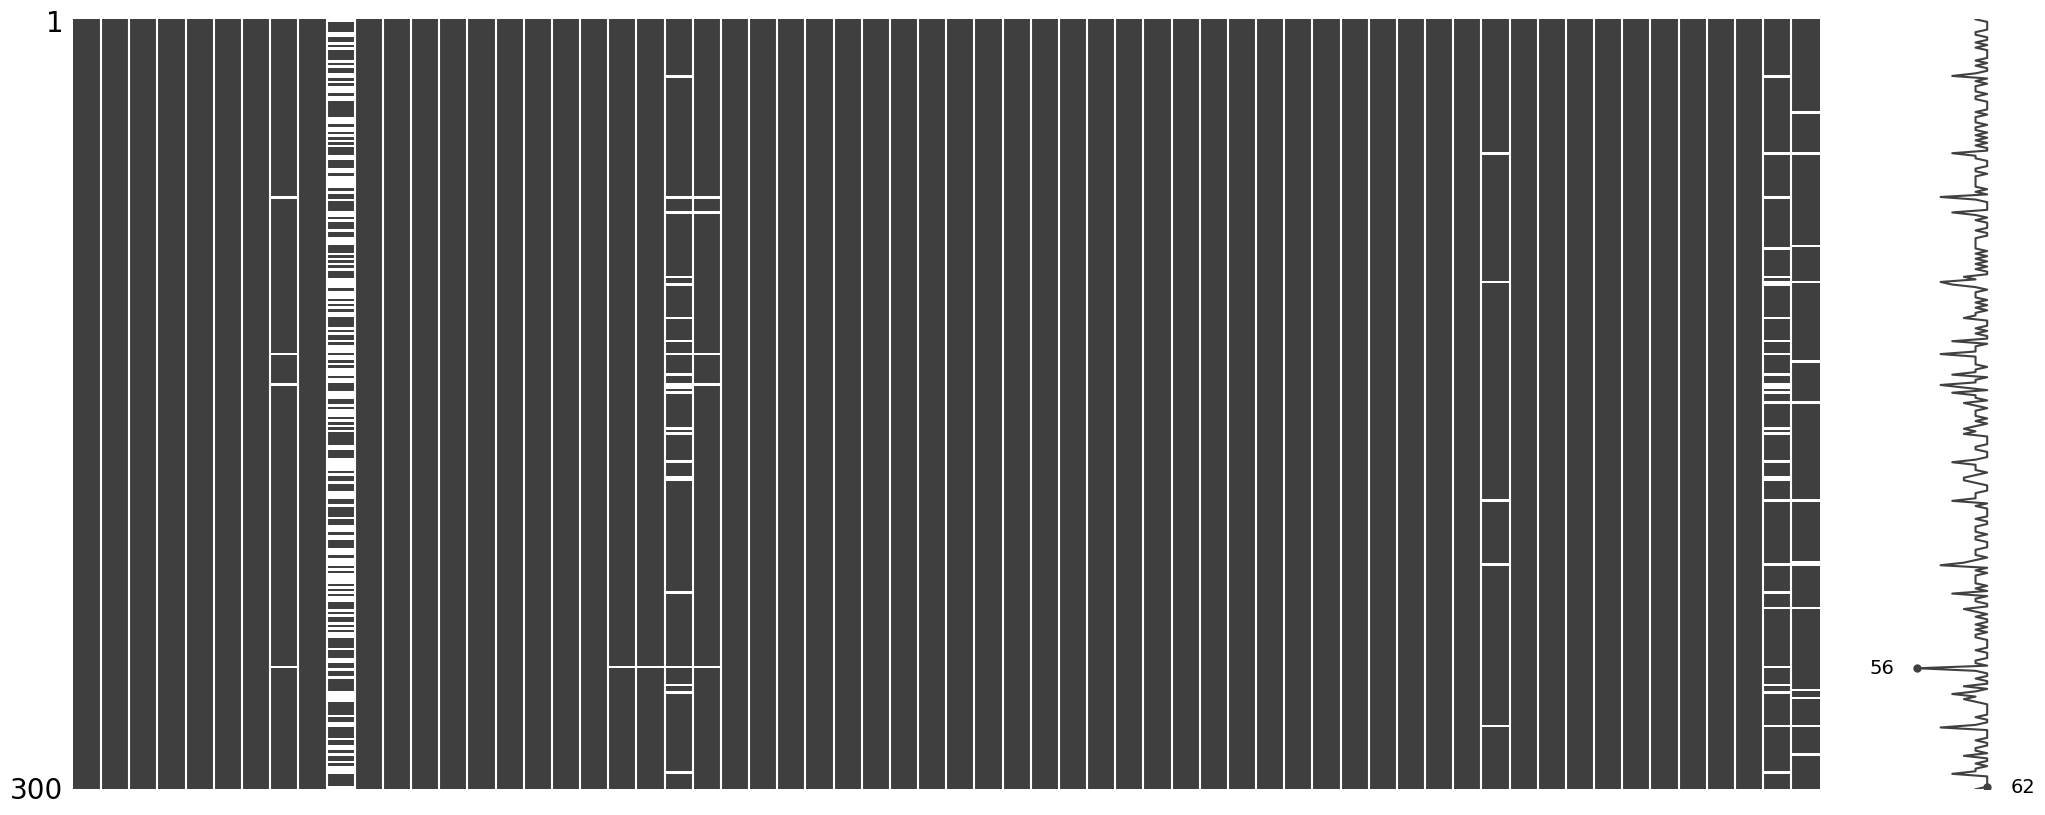

In [9]:
#Buscamos e identificamos Hucos en nuestro DF
msno.matrix(df.sample(300))#Buscamos lineas duplicadas
df.duplicated()

In [10]:
#Buscamos lineas duplicadas
df.duplicated()

ID
212198    False
209658    False
176580    False
192985    False
224334    False
          ...  
240558    False
262846    False
241317    False
259646    False
178453    False
Length: 16710, dtype: bool

In [11]:
#Buscamos datos Nulos
df.isnull()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
212198,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
209658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176580,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
192985,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
224334,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
262846,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
241317,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [12]:
#reemplazamos los Nulos por Cero (o)
df.fillna(0)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,0.0,250.0,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,93.0,140.0,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,0.0,135.0,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,0.0,350.0,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",2025,181cm,70kg,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,37.0,45.0,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",2024,172cm,69kg,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,100.0,1.0,782,Right,1.0,2.0,1.0,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES",31.0,"Jul 1, 2016",2019,188cm,80kg,12.0,5.0,13.0,18.0,7.0,12.0,11.0,13.0,19.0,10.0,15.0,21.0,34.0,30.0,31.0,16.0,51.0,26.0,57.0,6.0,16.0,9.0,5.0,29.0,18.0,37.0,11.0,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,0.0
262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.c

In [13]:
#Utilizamos las funcion Describe para conocer algunos datos Estadisticos del DF que estamos trabajando
df.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,16710.000000,16710.000000,16710.000000,8771.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16684.000000,16710.000000,16710.000000,16710.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16702.000000,16702.000000,16673.000000,16710.000000,16459.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,15818.000000
mean,25.727409,67.646320,72.572292,402.699350,90.102095,1652.497307,1.169958,3.008199,2.475464,20.458643,52.212448,48.725075,54.123339,61.314423,45.652972,58.591203,50.574522,45.074087,55.454877,61.387433,65.684919,65.783124,65.222875,63.592400,64.943262,60.642190,65.896659,64.204548,66.266008,49.989228,57.955536,48.057418,53.150461,56.378936,50.615919,61.001883,49.155536,46.830564,15.683662,15.521364,15.457989,15.581927,15.789228,68.565410,48.019408
std,5.048910,6.457695,5.688085,315.990247,212.361038,257.271696,0.485305,0.681742,0.791414,17.699813,17.772348,19.401715,17.007831,13.665353,17.828225,17.925005,18.237536,17.596471,14.494716,15.673348,15.005583,14.737924,14.512499,8.594003,14.257323,12.959795,12.285499,15.575110,12.624115,19.082943,16.855790,20.846484,19.204880,13.415572,15.756832,11.399833,21.454857,21.175431,17.009757,16.302298,16.099993,16.584045,17.318251,6.256253,20.181354
min,16.000000,28.000000,38.000000,0.000000,0.000000,571.000000,1.000000,1.000000,1.000000,1.000000,7.000000,3.000000,5.000000,8.000000,4.000000,5.000000,6.000000,4.000000,9.000000,8.000000,13.000000,15.000000,18.000000,28.000000,19.000000,12.000000,22.000000,13.000000,18.000000,4.000000,11.000000,4.000000,3.000000,10.000000,7.000000,12.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,3.000000
25%,22.000000,63.000000,69.000000,30.000000,3.000000,1525.000000,1.000000,3.000000,2.000000,8.000000,42.000000,34.000000,46.000000,57.000000,33.000000,54.000000,39.000000,33.000000,47.000000,58.000000,58.000000,59.000000,57.000000,58.000000,57.000000,52.000000,59.000000,57.000000,59.000000,37.000000,47.000000,28.000000,44.000000,48.000000,41.000000,55.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,65.000000,30.000000
50%,25.000000,68.000000,72.000000,400.000000,7.000000,1687.000000,1.000000,3.000000,2.000000,17.000000,57.000000,53.000000,57.000000,64.000000,48.000000,63.500000,53.000000,44.000000,58.000000,65.000000,68.000000,68.000000,68.000000,64.000000,67.000000,62.000000,67.000000,67.000000,68.000000,55.000000,61.000000,55.000000,58.000000,58.000000,52.000000,62.000000,57.000000,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,54.000000
75%,29.000000,72.000000,76.000000,675.000000,24.000000,1826.000000,1.000000,3.000000,3.000000,27.000000,65.000000,64.000000,66.000000,70.000000,59.000000,70.000000,64.000000,59.000000,66.000000,71.000000,76.000000,76.000000,75.000000,69.000000,75.000000,70.000000,74.000000,75.000000,75.000000,65.000000,71.000000,65.000000,67.000000,66.000000,62.000000,69.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,73.000000,65.000000
max,54.000000,93.000000,95.000000,975.000000,950.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,94.000000,95.000000,93.000000,94.000000,90.000000,96.000000,94.000000,94.000000,93.000000,96.000000,97.000000,97.000000,96.00000

# Explorar los Datos de nuestro Dataset (EDA)




Text(0, 0.5, 'Jugador')

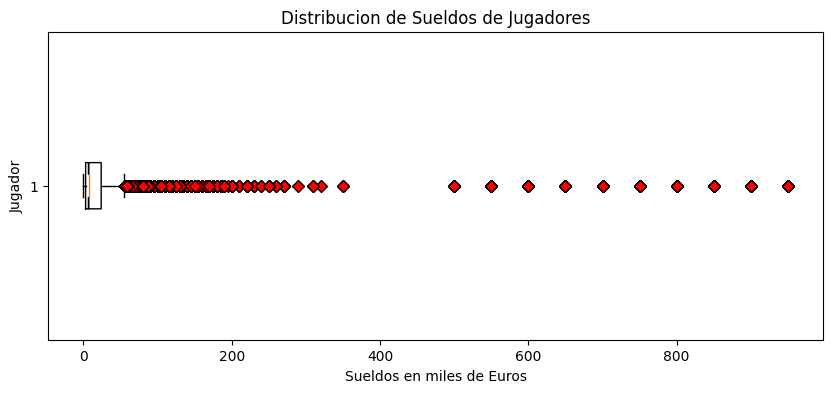

In [14]:
#Graficamos un Box, buscamos identificar el Sueldo medio de los jugadores del Dataset
green_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots(figsize=(10,4))
ax.boxplot(df['Wage'],vert=False,notch=True,flierprops=green_diamond)
ax.set_title('Distribucion de Sueldos de Jugadores')
ax.set_xlabel('Sueldos en miles de Euros')
ax.set_ylabel("Jugador")

Sabiendo que la Media de Salarios de los jugadores del Dataset es de €90.000, podemos observar en el grafico de cajas

 (Boxplot), que hay muchas dispersiones alejadas de la misma (Outliers), estos casos excepcionales sesgan el grafico.


In [15]:
#Definimos una nueva Variable para analizar los sueldos mayores al promedio
df_90k = df[df['Wage']>=90]

In [16]:
#Conocemos los datos estadisticos de nuestra nueva Variable
df_90k.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,2311.000000,2311.000000,2311.000000,1710.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.00000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2304.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2283.000000
mean,22.856339,63.386846,72.505409,397.166082,583.431415,1525.205971,1.186499,2.911294,2.273475,24.178711,45.979230,43.438338,48.729122,55.81177,39.895716,52.952402,44.302899,40.012116,49.747728,55.588490,64.254868,64.143661,62.460407,58.579836,63.975335,54.463436,62.945478,59.443098,61.686716,43.156642,51.675465,42.936824,47.292081,51.334920,45.996106,54.729601,44.883600,42.995240,16.860234,16.594115,16.531804,16.583730,16.959325,64.548248,42.939553
std,5.437815,8.813414,6.929755,256.499313,205.851561,300.764067,0.622319,0.702751,0.783809,19.038184,18.589144,20.465756,17.700691,15.89518,18.277063,19.954220,18.739730,17.540006,16.154100,18.057096,16.085471,15.741064,15.237260,11.274824,14.863005,13.982219,11.981969,16.716405,13.224717,20.086623,17.107334,20.983758,20.601684,14.694475,16.463142,13.938681,21.419735,20.774911,17.932508,17.150382,16.952766,17.107447,18.166714,8.559250,20.365758
min,16.000000,47.000000,49.000000,0.000000,90.000000,754.000000,1.000000,1.000000,1.000000,1.000000,7.000000,3.000000,8.000000,11.00000,4.000000,5.000000,8.000000,5.000000,9.000000,10.000000,15.000000,15.000000,19.000000,28.000000,20.000000,20.000000,22.000000,15.000000,23.000000,4.000000,11.000000,4.000000,3.000000,13.000000,7.000000,17.000000,7.000000,8.000000,2.000000,2.000000,2.000000,2.000000,3.000000,47.000000,3.000000
25%,18.000000,58.000000,68.000000,200.000000,500.000000,1376.500000,1.000000,2.000000,2.000000,11.000000,34.000000,27.000000,41.000000,49.00000,28.000000,46.000000,32.000000,29.000000,39.000000,50.000000,58.000000,59.000000,54.000000,51.000000,55.000000,44.000000,56.000000,52.000000,53.000000,28.000000,40.000000,23.000000,34.000000,41.000000,37.000000,46.000000,24.000000,23.000000,8.000000,8.000000,8.000000,8.000000,8.000000,59.000000,25.000000
50%,21.000000,62.000000,72.000000,375.000000,500.000000,1526.000000,1.000000,3.000000,2.000000,21.000000,48.000000,46.000000,51.000000,58.00000,40.000000,58.000000,45.000000,38.000000,51.000000,59.000000,68.000000,67.000000,65.000000,57.000000,65.000000,54.000000,63.000000,62.000000,63.000000,45.000000,53.000000,48.000000,52.000000,52.000000,47.000000,54.000000,51.000000,48.000000,11.000000,11.000000,11.000000,11.000000,11.000000,63.000000,46.000000
75%,26.000000,68.000000,76.000000,575.000000,750.000000,1691.000000,1.000000,3.000000,3.000000,31.000000,59.000000,59.000000,60.000000,65.00000,52.000000,65.000000,57.000000,51.000000,61.000000,66.000000,75.000000,74.000000,73.000000,65.000000,75.000000,64.000000,71.000000,71.000000,72.000000,58.000000,64.000000,59.000000,61.000000,60.500000,58.000000,63.000000,62.000000,60.000000,14.000000,14.000000,14.000000,14.000000,14.000000,69.000000,59.000000
max,54.000000,93.000000,95.000000,975.000000,950.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,94.000000,95.000000,92.000000,94.00000,90.000000,96.000000,93.000000,94.000000,93.000000,96.000000,97.000000,97.000000,96.000000,94.000000,95.000000,94.000000,95.00000

Definimos una nueva Media de sueldo de jugadores que estan sobre el promedio total de los inscriptos en FIFA €583K

Text(0.5, 0, 'Sueldos en miles de Euros')

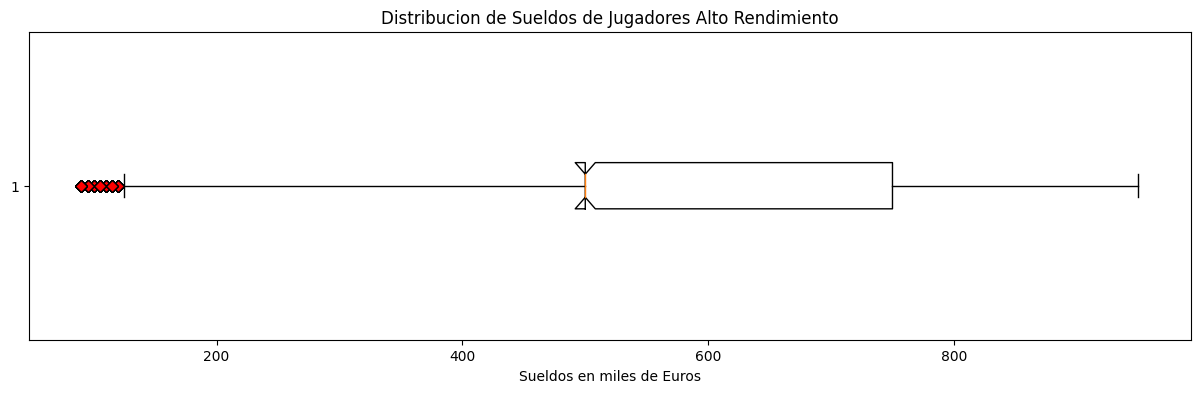

In [17]:
#Graficamos nuevamente un Box, pero esta vez condicionado a la nueva Variable
#donde los salarios son mayores a 90K
green_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots(figsize=(15,4))
ax.boxplot(df_90k['Wage'],vert=False,notch=True,flierprops=green_diamond)
ax.set_title('Distribucion de Sueldos de Jugadores Alto Rendimiento')
ax.set_xlabel('Sueldos en miles de Euros')

Ahora Si… Con la nueva Variable definida,

tenemos que el Sueldo Medio de un Jugador de Alto rendimiento  es de €580.000


---



Text(0.5, 0, 'Sueldos en miles de Euros')

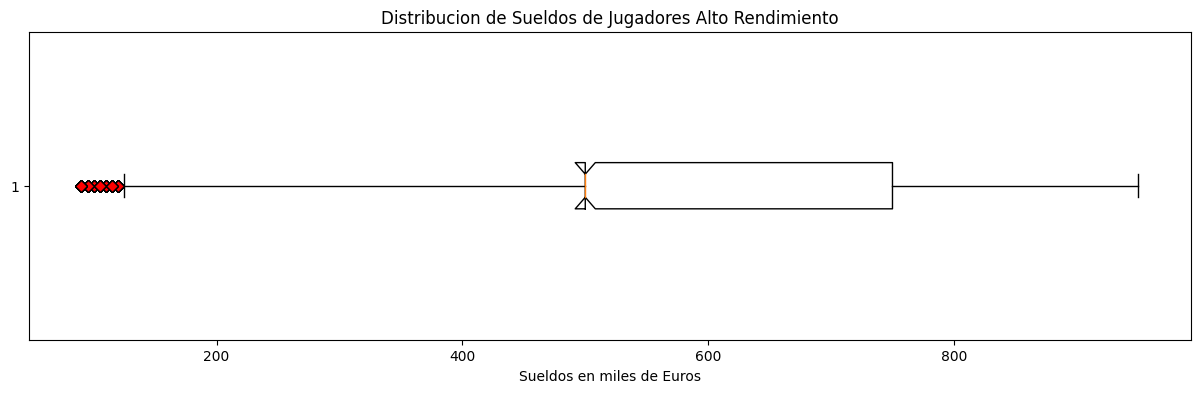

In [18]:
#Graficamos nuevamente un Box, pero esta vez condicionado a la nueva Variable
#donde los salarios son mayores a 90K
green_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots(figsize=(15,4))
ax.boxplot(df_90k['Wage'],vert=False,notch=True,flierprops=green_diamond)
ax.set_title('Distribucion de Sueldos de Jugadores Alto Rendimiento')
ax.set_xlabel('Sueldos en miles de Euros')

En el grafico podemos observar una gran mayoria de jugadores con una Valorizacion de mercado de entre 0 y 50K de euros, El resto de los jugadores del mercado estan distribuidos uniformemente





Text(0.5, 1.0, 'Valoracion del Mercado Vs Sueldo del jugador')

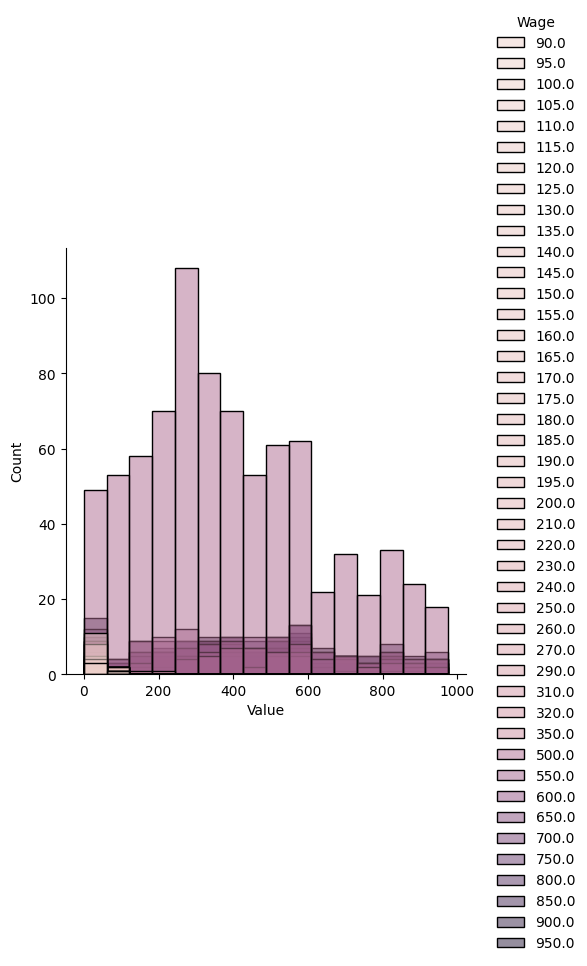

In [19]:
#Relacion entre Valoracion de Jugadores de alto rendimiento en el mercado y Sus Sueldos

sns.displot(data=df_90k, x="Value", hue="Wage", alpha=0.5)
ax.set_title("Valoracion del Mercado Vs Sueldo del jugador")

**Valoracion Vs Sueldo para jugadores alto rendimiento**

La relación que observamos en este Grafico es que los jugadores con Mayor Valoración de mercado son la minoría, de €600.000 Euros hacia arriba,

 mientras que los que están Valorados entre €200.000 y €400.000 Euros, acumulan la mayor cantidad de Sueldo de del Mercado del futbol internacional.

 **NOTA: seguramente este grafico nos este mostrando mucha mas informacion que la que se esta comentando en esta nota,

  es cuestion de poner a practicar el ojo viendo y analizando, para poder exprimirlo al maximo**


Text(0.5, 0, 'Potencial')

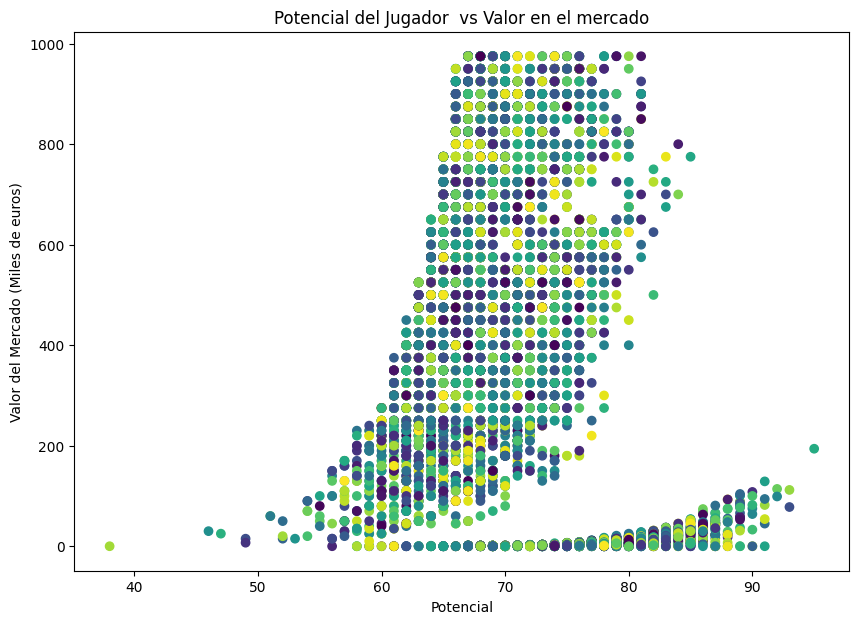

In [20]:
#En esta oportunidad realizaremos un Scatter para hacer un analicis Bivariado,
#entre las dos variables mas significativas del mercado
np.random
fig, ax = plt.subplots(figsize=(10,7))
colors = np.random.rand(df['Potential'].size)
ax.scatter(df['Potential'], df['Value'], c=colors)
ax.set_title('Potencial del Jugador  vs Valor en el mercado')
ax.set_ylabel('Valor del Mercado (Miles de euros)')
ax.set_xlabel('Potencial')

Analizamos el Grafico de Dispersión de Atributos (ScatterPlot).


Potencial del Jugador Vs Valor de mercado, claramente hay dos Grupos, uno de ellos (Grupo A),

en donde la Valoración esta muy por sobre encima del potencial medio, y para el otro grupo jugadores (Grupo B), es indistinto el Potencial que tenga,

Su Valoración en el mercado es mínima a comparación del resto.


In [21]:
#Utilizamos la Funcion Groupby para conocer cuantos jugadores de cada pais estan inscriptos en FIFA
df.groupby('Nationality').size()
nacion_agrupados = df.groupby('Nationality').size()
nacion_agrupados = nacion_agrupados.sort_values(ascending=False)
nacion_agrupados.head(12)

Nationality
England                1845
Spain                  1151
Germany                1120
France                  987
Argentina               846
Brazil                  819
Italy                   514
Netherlands             443
Portugal                354
United States           341
Mexico                  312
Republic of Ireland     308
dtype: int64

(-1.0, 20.0)

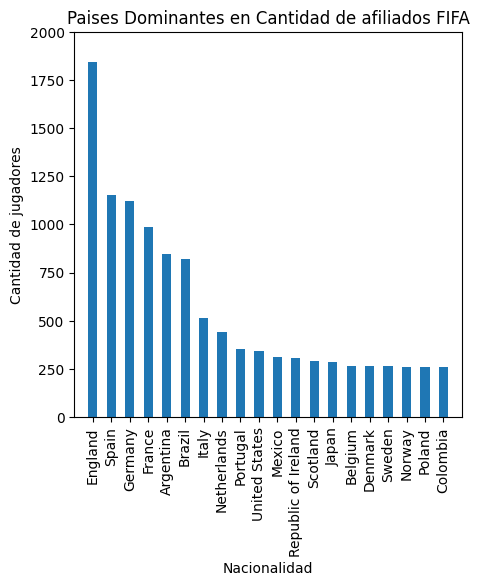

In [22]:
#Graficamos la info del paso anterior
plt.figure(figsize=(5,5))
plt.subplot()
nacion_agrupados.nlargest(20).plot.bar()
plt.title("Paises Dominantes en Cantidad de afiliados FIFA")
plt.xlabel("Nacionalidad")
plt.ylabel("Cantidad de jugadores")
plt.ylim(0,2000)
plt.xlim(-1,20)

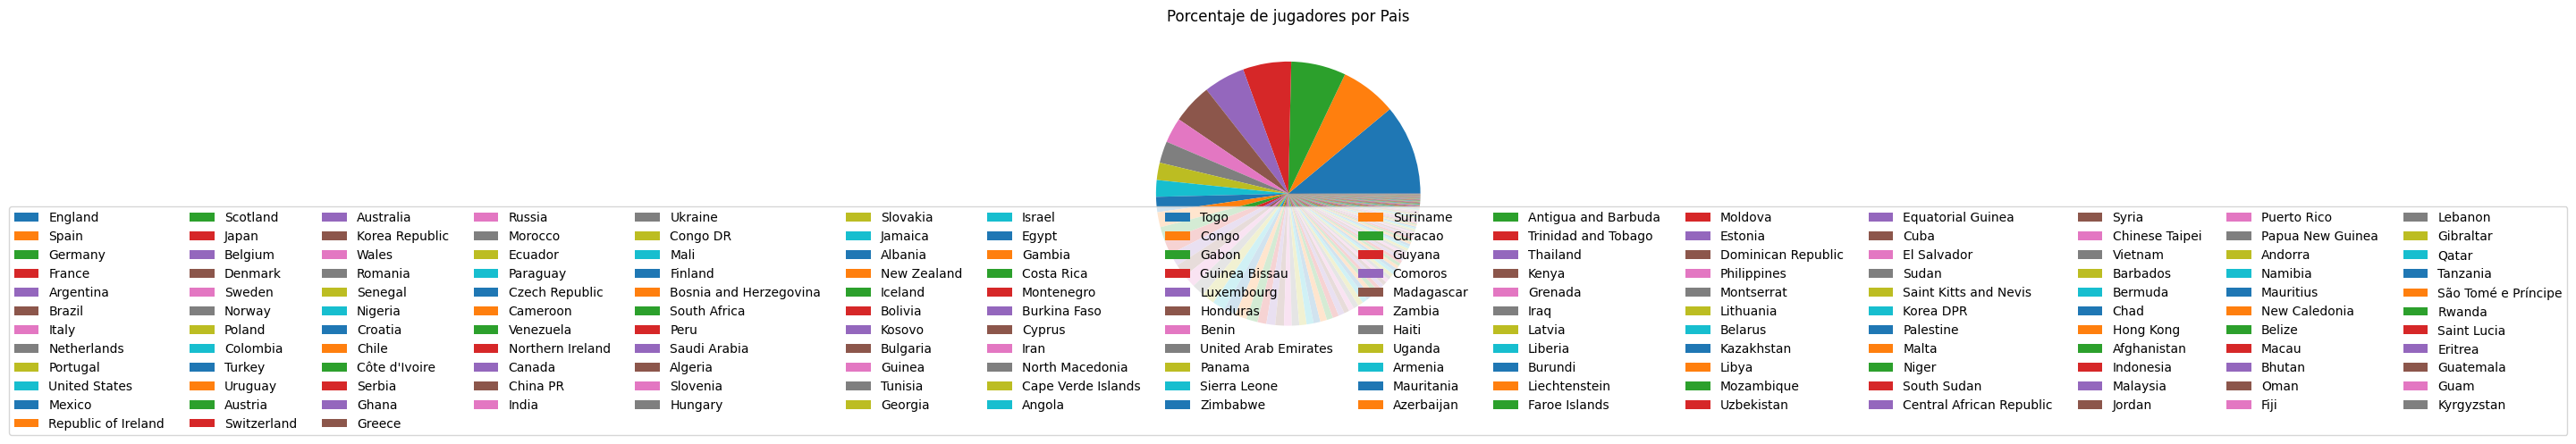

In [23]:
#Graficamos en un PIE para conocer emn Porcentaje cuales son los paices dominantes en cantidad de jugadores
plt.pie(nacion_agrupados, autopct='', textprops={'fontsize': 15})
plt.title("Porcentaje de jugadores por Pais")
plt.legend(labels=nacion_agrupados.index, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=15)
plt.show()

El Pais con mas jugadores inscriptos en FIFA es Inglaterra, No obstante, hay un grupo de 10 paices que se diferencian del resto por gran cantidad de participantes, ese TOP 10 acupan el 50% de la totalidad de Jugadores inscriptos en la FIFA




In [24]:
#Definimos un nuevo DF para trabajar con los jugadores mas Valorados del mercado
df_paisesstars = df[df['Value']>90].groupby('Nationality').size().reset_index(name='counts')
df_paisesstars.sort_values(ascending=False, inplace=True, by='counts')
df_paisesstars.head(10)

,Nationality,counts
48,England,1120
58,Germany,516
54,France,323
138,Spain,249
124,Republic of Ireland,216
6,Argentina,186
130,Scotland,183
152,United States,182
78,Italy,154
107,Netherlands,141


Text(0.5, 0, 'Numero de jugadores')

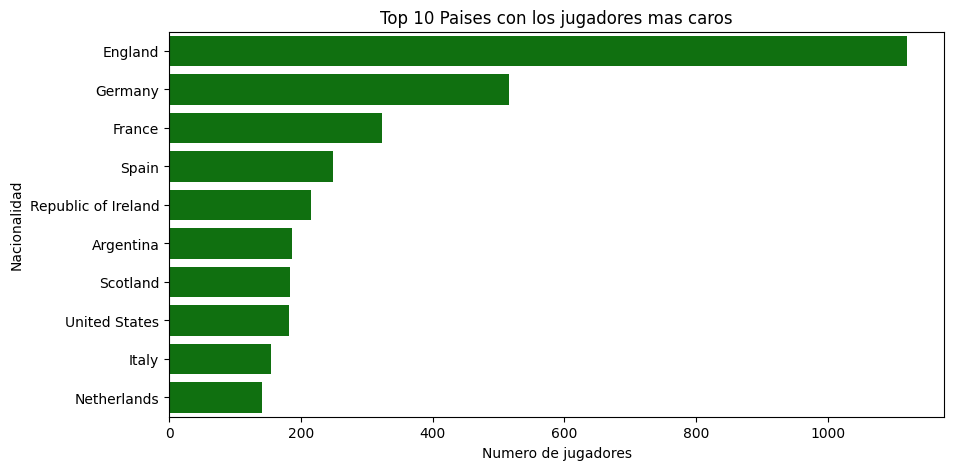

In [25]:
#Realizamos un grafico de barras para ver que pais es dominante en jugadores mas Costosos
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Top 10 Paises con los jugadores mas caros')
sns.barplot(data=df_paisesstars.head(10), y='Nationality', x='counts',orient='h',color="g")
ax.set_ylabel('Nacionalidad')
ax.set_xlabel('Numero de jugadores')

En Cantidad de Jugadores, existe un Top 6 de países dominante.
Ahora bien, que tengan la parte mayoritaria de jugadores, no quiere decir que necesariamente sea el país con los jugadores mas valorados de FIFA, en el grafico de la derecha observamos que Irlanda esta dentro del Top5 de jugadores mas caros sin necesariamente tener la mayor cantidad de jugadores del mercado. Por contraparte, Brasil que esta dentro del Top6 de cantidad de jugadores, no ingresa dentro de los primeros puestos de Valorización monetaria de los mismos.


In [26]:
#Posicion de Juego de mayor Valoracion en el mercado

df_posiciones = df[df['Value']>90].groupby('Best Position').size().reset_index(name='counts')
df_posiciones.sort_values(ascending=False, inplace=True, by='counts')
df_posiciones.head()

,Best Position,counts
1,CB,1336
14,ST,999
5,GK,760
0,CAM,754
11,RM,490


Text(0, 0.5, 'Numero de jugadores')

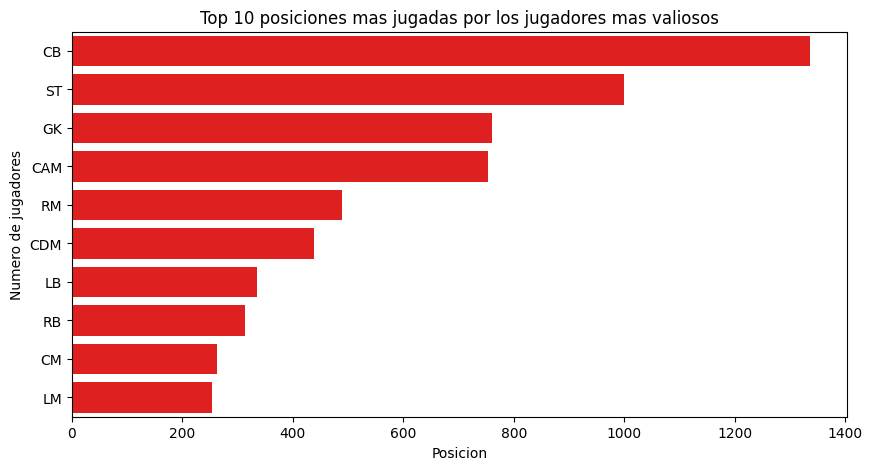

In [27]:
#En esta ocacion, realizaremos un Bar plot para verificar cuales son las posiciones de juego
#dentro del campo que predominan en el mercado
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Top 10 posiciones mas jugadas por los jugadores mas valiosos')
sns.barplot(data=df_posiciones.head(10), x='counts', y='Best Position', color="r")
ax.set_xlabel('Posicion')
ax.set_ylabel('Numero de jugadores')

Las posiciones de juego mas valiosas del mercado:

CB Defensa Central - 1

ST Delantero Centro - 2

GK Portero - 3

CAM Medio Centro Ofensivo - 4

RM Medio Derecho - 5

CDM Medio Centro Defensivo - 6

LB Segundo Delantero Derecho - 7

RB Lateral Derecho - 8

CM Medio Centro - 9

LM Lateral Derecho - 10



# EDA Con Pandas Profiling

OJO... NO Ejecutar el codigo hasta resolver el error

In [ ]:
#Se intento aplicar Pandas profil par aque nos ayude en el EDA pero no da un error continuamente,
#se sigue averiguando como podemos resolver este error, en entregas futuras probablemente ya este resuelto


! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 22.6 MB 24.4 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=353021 sha256=ff84cb2d262a717c429ee81bc8290182fe60c0991b34ef0fb380090357cd8826
  Stored in directory: /tmp/pip-ephem-wheel-cache-m6cykc73/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cc746b6a36f6db8ea4c74544aaff028f19db77294cedd51ac8d1f8a4b18d7b2a
  Stored in directory: /roo

In [ ]:
#Data Profiling
import pandas_profiling


<ipython-input-21-0c3593847ebb>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
profile = pandas_profiling.ProfileReport(df_paisesstars)
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: ignored

<Figure size 600x400 with 0 Axes>

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_paisesstars)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: ignored

<Figure size 600x400 with 0 Axes>

**NOTA**

fuente: https://chat.openai.com/?model=text-davinci-002-render-sha

El error "ValueError: Only supported for TrueType fonts" indica que hay un problema relacionado con las fuentes (tipografías) utilizadas en la función `ydata_profiling`. Este error ocurre cuando la función intenta trabajar con un tipo de fuente que no es compatible.

La mayoría de las bibliotecas de generación de gráficos, como Matplotlib, requieren fuentes TrueType (.ttf) para renderizar texto correctamente en los gráficos. Si estás utilizando la función `ydata_profiling` con Matplotlib o alguna otra biblioteca gráfica, podría estar intentando usar una fuente que no es TrueType.

Para solucionar este problema, puedes intentar hacer lo siguiente:

1. Asegúrate de tener una fuente TrueType instalada en tu sistema. Puedes verificar las fuentes instaladas en tu máquina.

2. Si estás usando Matplotlib, puedes especificar la fuente que deseas utilizar explícitamente. Por ejemplo:

```python
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'  # Reemplaza 'Arial' con la fuente TrueType que tengas instalada

# Luego, llama a tu función ydata_profiling aquí
```

3. Si la función `ydata_profiling` permite configurar la fuente que se utiliza, busca la documentación de la función para ver si puedes especificar la fuente de alguna manera.

Si después de intentar estas soluciones sigues teniendo el mismo error, es posible que el problema esté en la implementación de la función `ydata_profiling` o en la forma en que estás utilizando las bibliotecas gráficas. En ese caso, puede ser útil revisar la implementación de la función o proporcionar más detalles sobre cómo la estás utilizando para que pueda brindarte una ayuda más específica.

# Modelo a entrenar (primer prueba)

Verificar si hay algun tipo de incidencia en el potencial de los jugadores zurdos o Diestros, dependiendo del pie mas habil

In [28]:
#Selleccionamos cuales columnas trabajaremos para verificar las habilidades entre los distintos jugadores

df_modelo=df[["Preferred Foot",'Volleys',"Overall",'Potential','BallControl',"ShotPower"]]
df_modelo.head(5)

,Preferred Foot,Volleys,Overall,Potential,BallControl,ShotPower
ID,,,,,,
212198,Right,87.0,88,89,87.0,89.0
209658,Right,69.0,87,88,87.0,85.0
176580,Right,90.0,88,88,86.0,89.0
192985,Right,82.0,91,91,91.0,91.0
224334,Left,68.0,84,84,88.0,82.0


Balanceamos los Datos con respecto a la Columna "Volleys"


In [29]:
class_counts = df_modelo['Volleys'].value_counts()
class_counts.head(5)

59.0    419
55.0    400
48.0    389
58.0    373
52.0    366
Name: Volleys, dtype: int64

In [30]:
min_count = class_counts.min()
min_count

1

In [31]:
balanced_data= df_modelo.groupby('Volleys').apply(lambda x: x.sample(min_count))
balanced_data.head(5)

,,Preferred Foot,Volleys,Overall,Potential,BallControl,ShotPower
Volleys,ID,,,,,,
4.0,246806,Right,4.0,68,68,11.0,46.0
5.0,258555,Right,5.0,59,79,19.0,46.0
6.0,236568,Right,6.0,64,72,17.0,41.0
7.0,261755,Right,7.0,59,70,21.0,44.0
8.0,236028,Right,8.0,65,73,24.0,49.0


In [32]:
balanced_data = balanced_data.reset_index(drop=True)
balanced_data.head(5)

,Preferred Foot,Volleys,Overall,Potential,BallControl,ShotPower
0,Right,4.0,68,68,11.0,46.0
1,Right,5.0,59,79,19.0,46.0
2,Right,6.0,64,72,17.0,41.0
3,Right,7.0,59,70,21.0,44.0
4,Right,8.0,65,73,24.0,49.0


Text(0.5, 1.0, 'Potencia de disparo vs. Control de balon')

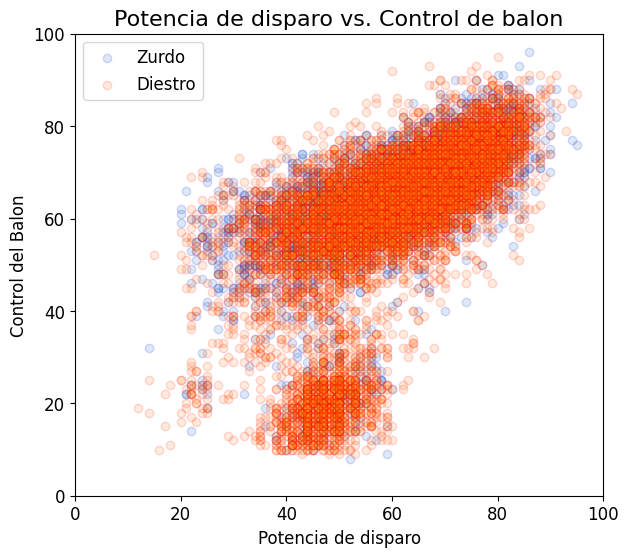

In [33]:
# Extraemos algunas columnas de interes
balanced_data = df[["Preferred Foot",  "ShotPower",'BallControl']]
# Filtramos por pierna mas habil en el nuevo DS
df_Z =  balanced_data[ balanced_data['Preferred Foot'] == 'Left']

df_D =  balanced_data[ balanced_data['Preferred Foot'] == 'Right']

plt.figure(figsize=(15,6))

# Control del balon VS Potencia de tiro - Para los Zurdos y Diestros
plt.subplot(121)
plt.scatter(df_Z['ShotPower'], df_Z['BallControl'], edgecolor='b', alpha=0.15, label='Zurdo')
plt.scatter(df_D['ShotPower'], df_D['BallControl'], edgecolor='r', alpha=0.15, label='Diestro')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 100)
plt.xlabel('Potencia de disparo', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Control del Balon', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Potencia de disparo vs. Control de balon', fontsize=16)

En primera impresion, pareciera que hay dos Zonas marcadas en diferencia de habilidades, pero no distinguidas etre Zurdos y Diestros, por un lado hay jugadores con poco control del balon y potencia de disparo media, por otro lado hay jugadores que estan con el control del balon y potencia media, y luego la zona en los que se destacan de alto control del balon y alta potencia de disparo.

Implementacion del $k$-means usando `sklearn`

In [34]:
#Primero debemos crear una nueva Columna para pasar el "Preferred Foot"
#de STR a INT para que el modelo lo tome
balanced_data = df[["Preferred Foot",  "ShotPower",'BallControl']]
balanced_data['Pie'] = df['Preferred Foot'].map(lambda x: 1 if x == 'Left' else 2)
balanced_data.head(10)

<ipython-input-34-f7b648833d62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_data['Pie'] = df['Preferred Foot'].map(lambda x: 1 if x == 'Left' else 2)


,Preferred Foot,ShotPower,BallControl,Pie
ID,,,,
212198,Right,89.0,87.0,2
209658,Right,85.0,87.0,2
176580,Right,89.0,86.0,2
192985,Right,91.0,91.0,2
224334,Left,82.0,88.0,1
212622,Right,78.0,85.0,2
187961,Right,83.0,83.0,2
181291,Right,78.0,88.0,2
208333,Right,85.0,79.0,2


In [35]:
#Creamos una nueva Variable  df_modelo_ok con todos los datos INT (ahora el Diestro es 2 y el Zurdo es 1)

df_modelo_ok=balanced_data[["Pie", "ShotPower",'BallControl']]
df_modelo_ok.head(10)

,Pie,ShotPower,BallControl
ID,,,
212198,2,89.0,87.0
209658,2,85.0,87.0
176580,2,89.0,86.0
192985,2,91.0,91.0
224334,1,82.0,88.0
212622,2,78.0,85.0
187961,2,83.0,83.0
181291,2,78.0,88.0
208333,2,85.0,79.0


In [36]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [37]:
X = np.array(balanced_data["BallControl"])
y = np.array(balanced_data["ShotPower"])

reg = LinearRegression().fit(X.reshape(-1, 1),y)

nuevos_datos = np.array(balanced_data["BallControl"])
predicciones = reg.predict(nuevos_datos.reshape(-1, 1))
nuevos_datosy = np.array(balanced_data["ShotPower"])
prediccionesy = reg.predict(nuevos_datosy.reshape(-1, 1))

predicciones

array([73.80128898, 73.80128898, 73.28751391, ..., 35.26815842,
       35.78193349, 46.57121005])

In [38]:
prediccionesy

array([74.82883913, 72.77373883, 74.82883913, ..., 46.57121005,
       44.00233468, 49.14008542])

Generamos una Matriz de Confusion para analizar nuestro modelo

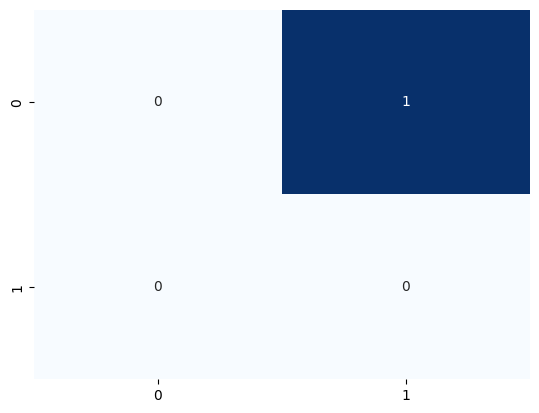

In [39]:
predicciones=np.array(["BallControl"])
prediccionesy=np.array(["ShotPower"])

cm= confusion_matrix(predicciones,prediccionesy)
labels=["clase 0", "Clase1"]

fig, ax=plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
plt.show()

Comenzamos con el modelo

In [40]:
k = 3 # Definir los grupos
kmeans = KMeans(n_clusters=k, init='k-means++')
#fit entrena el modelo
kmeans.fit(df_modelo_ok)
#predict asigna los clusters
labels = kmeans.predict(df_modelo_ok)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
centroids

array([[ 1.86944128, 45.87742303, 22.50342075],
       [ 1.74342534, 70.07041947, 70.1324712 ],
       [ 1.73809524, 50.06499826, 59.25512687]])

In [42]:
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [43]:
sum_sq_d = []
K = range(1,14)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_modelo_ok[["ShotPower",'BallControl']])
    sum_sq_d.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

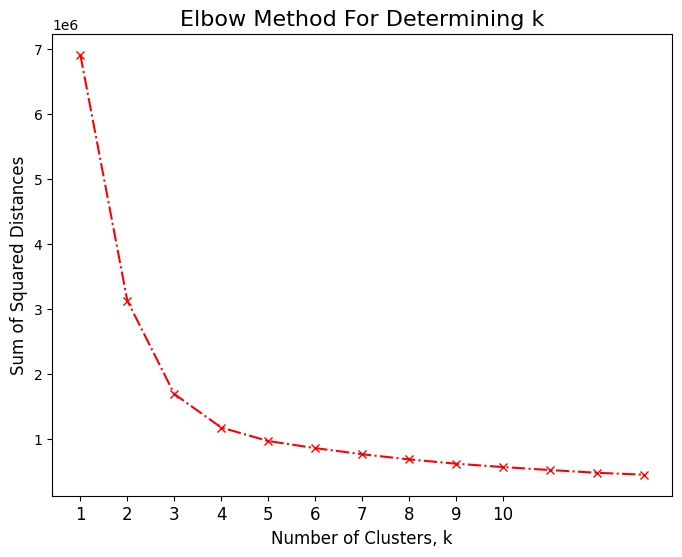

In [44]:
#Metodo del Codo para verificar el numero de Clusters

plt.figure(figsize=(8,6))
plt.plot(K, sum_sq_d, 'rx-.')
plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(fontsize=12)
plt.title('Elbow Method For Determining k', fontsize=16)
plt.show()

Primero se Probo con K=4 se asemeja bastante, luego se prueba con K=3, los datos resultados son bastante cercanos

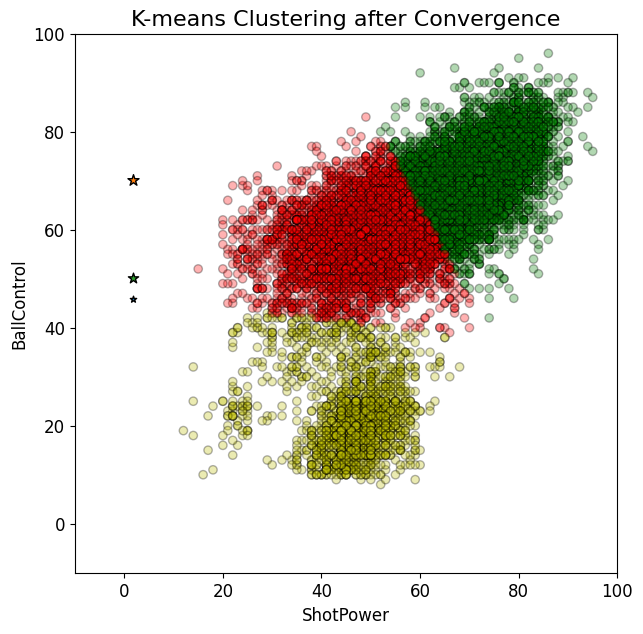

In [45]:
#Graficamos el modelo

plt.figure(figsize=(7,7))
color_map = {1:'y', 2:'g', 3:'r'}

#colores según el cluster al que pertenezcas
colors = [color_map[x+1] for x in labels]

plt.scatter(df_modelo_ok['ShotPower'], df_modelo_ok['BallControl'], color=colors, alpha=0.3, edgecolor='k')


for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, marker='*', edgecolor='k')
plt.xlim(-10,100)
plt.xlabel('ShotPower', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-10,100)
plt.ylabel('BallControl', fontsize=12)
plt.yticks(fontsize=12)
plt.title('K-means Clustering after Convergence', fontsize=16)
plt.show()

El modelo se acerca a lo previsto en el Scatter Original, si bien no hay diferencia entre Zurdo y Diestro, si hay 3 zonas de Skills bien marcadas en grupos distintos:

Bajo Control del Balon y potencia de tiro media

Medio Control del balon y potencia de tiro media

Alto control del balon y potencia de tiro Alta

Se podria decir que el modelo se ajusta al DS